In [4]:
#optimizing the parameters of XCDM model(flat) by minimizing the chi-squared value

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

#data of H_obs,z_obs,sigma_obs 

H_obs = np.array([69,69,68.6,83,75,75,72.9,77,88.8,83,83,95,77,87.1,92.8,89,80.9,97,104,92,105,125,90,117,154,168,160,177,140,202,186.5])
z_obs = np.array([0.07,0.09,0.12,0.17,0.179,0.199,0.2,0.27,0.28,0.352,0.3802,0.4,0.4004,0.4247,0.4497,0.47,0.4783,0.48,0.593,0.68,0.781,0.875,0.88,0.9,1.037,1.3,1.363,1.43,1.53,1.75,1.965])
sigma_obs = np.array([19.6,12,26.2,8,4,5,29.6,14,36.6,14,13.5,17,10.2,11.2,12.9,50,9,62,13,8,12,17,40,23,20,17,33.6,18,14,40,50.4])

In [5]:
def H_model( z,parameters):
    omega_mo,wx,Ho = parameters
    H_model= Ho*np.sqrt(omega_mo*(1+z)**3 +(1-omega_mo)*((1+z)**(3*(1+wx))))
     #print("H_model1:", H_model)
    return H_model

In [8]:
def chi_sq( parameters,H_obs,z_obs,sigma_obs):
    n = z_obs.shape[0]
    H_theo = np.zeros(n)
    omega_mo,wx,Ho = parameters
    chi_sq = 0
    for i in range(n):
        H_theo[i]= H_model( z_obs[i],parameters)
        #print("H_obs, H_theo:", H_obs[i], H_theo[i])
        chi_sq = chi_sq + (H_obs[i] - H_theo[i])**2/(sigma_obs[i])**2
    return chi_sq

In [10]:
initial = np.array([0.3,-1,70])
soln = minimize( chi_sq ,initial,args=( H_obs,z_obs,sigma_obs),bounds=[(0,1),(-2,0),(0,np.inf)])
print("Optimal Parameters:", soln.x)
print("Convergence:", soln.success)

Optimal Parameters: [ 0.32230621 -1.24974723 70.8207098 ]
Convergence: True


In [12]:
initial = np.array([0.3,-1,70])
soln = minimize( chi_sq ,initial,args=( H_obs,z_obs,sigma_obs),bounds=[(0,1),(-2,0),(0,np.inf)])
print(soln)

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 14.360643778265583
        x: [ 3.223e-01 -1.250e+00  7.082e+01]
      nit: 19
      jac: [ 2.289e-03  7.530e-04  8.065e-05]
     nfev: 92
     njev: 23
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>


In [14]:
def log_prior(parameters):
    omega_mo,wx,Ho = parameters
    if  0 <= omega_mo<= 1 and -2<= wx<=0 and 50<= Ho <= 85  :
         return 0.0
    return -np.inf

In [16]:
def log_likelihood(parameters, H_obs, z_obs, sigma_obs):
    return -chi_sq(parameters, H_obs, z_obs, sigma_obs)/2

In [18]:
def log_probability(parameters,H_obs,z_obs ,sigma_obs):
    lp= log_prior(parameters)
    if not np.isfinite(lp):
        return -np.inf
    #print(lp)
    #print(lp + log_likelihood(parameters,H_obs,z_obs,sigma_obs)
    return lp + log_likelihood(parameters,H_obs,z_obs,sigma_obs)

In [20]:
import emcee
pos = soln.x +1e-4 * np.random.randn(200,3)
nwalkers ,ndim = pos.shape
sampler = emcee.EnsembleSampler(
    nwalkers,ndim,log_probability ,args =( H_obs,z_obs,sigma_obs))

In [22]:
pos,prob,state = sampler.run_mcmc(pos,1000,progress= True)

100%|██████████| 1000/1000 [00:17<00:00, 58.13it/s]


In [24]:
sampler.reset()

In [26]:
sampler.run_mcmc(pos,10000,progress=True)

100%|██████████| 10000/10000 [02:53<00:00, 57.79it/s]


State([[ 4.10052571e-01 -3.61701253e-01  5.73163889e+01]
 [ 3.71740402e-01 -8.95553885e-01  6.64849467e+01]
 [ 3.09394889e-01 -7.97412880e-01  6.72493239e+01]
 [ 2.33603717e-01 -7.70798535e-01  6.74647248e+01]
 [ 2.02627529e-02 -3.03025850e-01  6.03074089e+01]
 [ 3.81047084e-01 -1.23930014e+00  6.79645189e+01]
 [ 3.66642717e-01 -1.00719391e+00  6.79835251e+01]
 [ 3.65904980e-01 -6.58768658e-01  6.48071136e+01]
 [ 3.60331919e-01 -1.67496663e+00  7.11136817e+01]
 [ 2.70206492e-01 -9.73446682e-01  7.03101557e+01]
 [ 2.81804318e-01 -1.92569277e+00  8.15013238e+01]
 [ 3.47780986e-01 -1.96209855e+00  7.49549086e+01]
 [ 2.74994704e-01 -1.33366408e+00  7.42321728e+01]
 [ 2.98666763e-01 -1.93317389e+00  7.82029213e+01]
 [ 2.75276140e-01 -1.99164633e+00  7.83668915e+01]
 [ 3.86660399e-01 -1.34931045e+00  6.63994004e+01]
 [ 3.88226740e-01 -1.05572978e+00  6.49206750e+01]
 [ 2.61957662e-01 -1.38114197e+00  8.01316335e+01]
 [ 2.79484119e-01 -9.72168503e-01  6.56682342e+01]
 [ 4.14387092e-01 -8.6113

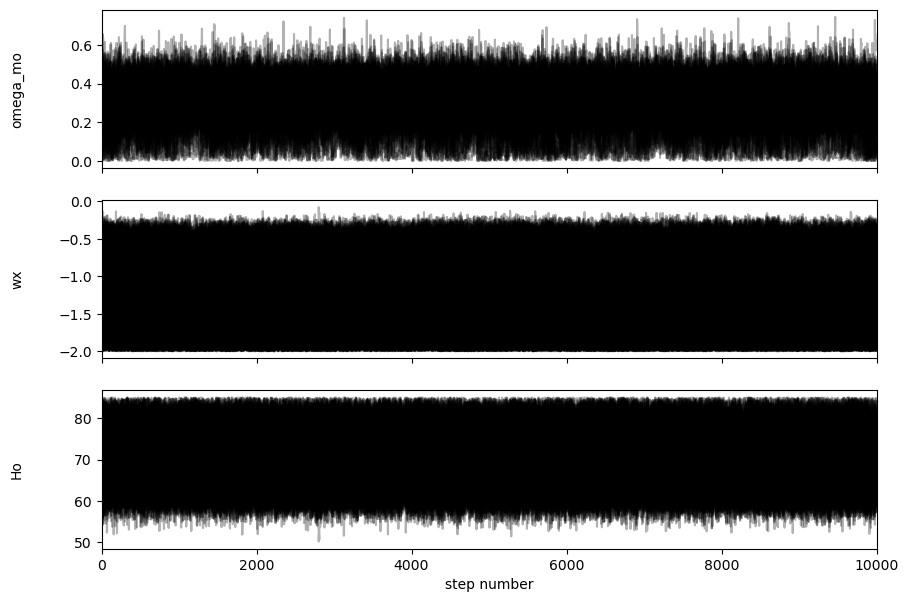

In [28]:
fig, axes = plt.subplots(3,figsize =(10,7),sharex=True)
samples = sampler.get_chain()
labels = ["omega_mo","wx","Ho"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:,:,i],"k",alpha= 0.3)
    ax.set_xlim(0,len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1,0.5)
    axes[-1].set_xlabel("step number");

In [29]:
tau = sampler.get_autocorr_time()
print(tau)

[90.36182762 91.59365261 72.16304615]


In [32]:
samples.shape

(10000, 200, 3)

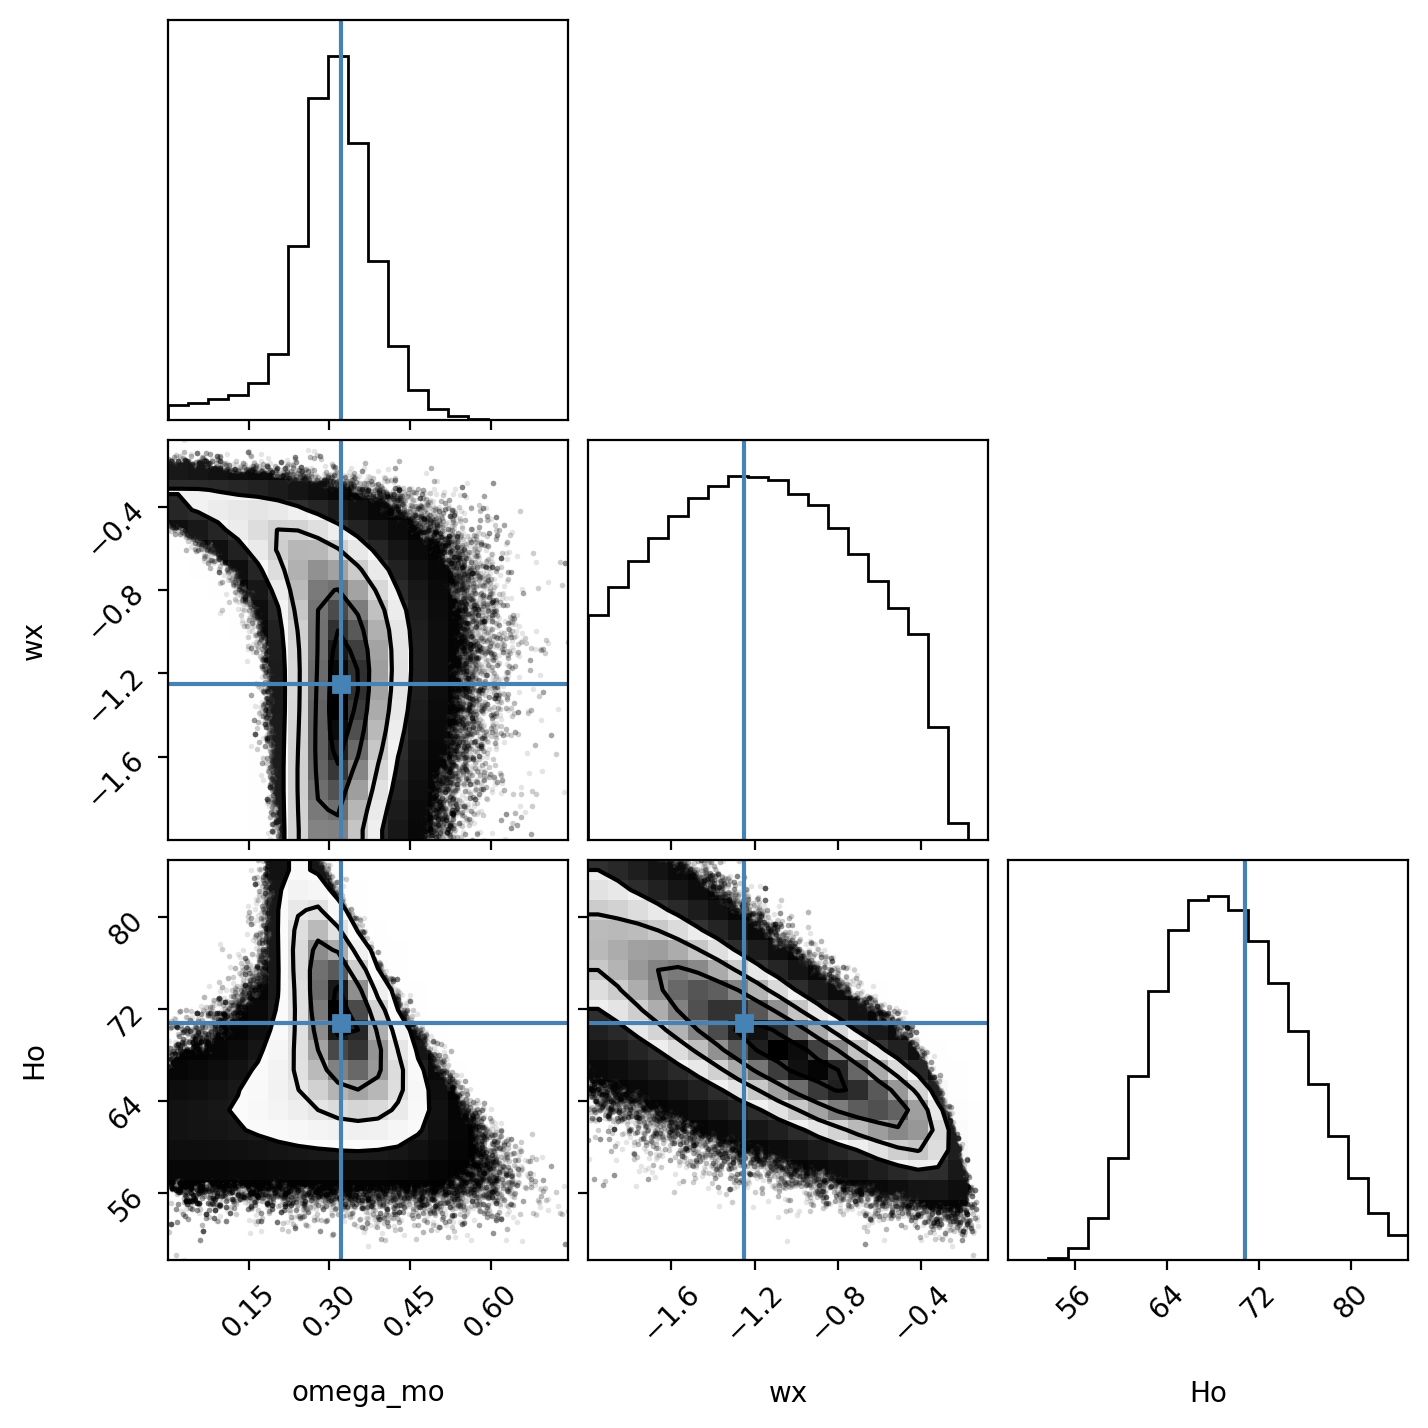

In [82]:
import corner
flat_samples = sampler.get_chain(flat =True)
#param_limits = [(0, 1), (-2,0), (50,85)]
fig = corner.corner(flat_samples,labels = labels ,truths = soln.x,smooth =0.8);

# # Increase the figure size
# fig = corner.corner(
#     flat_samples,
#     labels=labels,
#     truths=soln.x,
#     smooth=0.8,
#     figsize=(15,15)  # Adjust the figure size
# )

# # Adjust the layout to make sure everything fits well
# fig.tight_layout()

In [36]:
from IPython.display import display,Math
for i in range(ndim):
    mcmc = np.percentile(flat_samples[:,i],[15.87, 50, 84.13])
    q= np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1],q[0],q[1],labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [38]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"
import sys,os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
from getdist import plots,MCSamples
import getdist
import matplotlib.pyplot as plt
import IPython
print('GetDist Version :%s ,Matplotlib version:%s'%(getdist.__version__,plt.matplotlib.__version__))
      

GetDist Version :1.4.6 ,Matplotlib version:3.8.0


In [40]:
names = ["omega_mo","wx","Ho"]
labels = ["omega_mo","wx","Ho"]
samples = MCSamples(samples= flat_samples,names=names,labels=labels)

Removed no burn in


In [42]:
means = samples.getMeans()
stats = samples.getMargeStats()
conf_levels = samples.contours

In [43]:
print(means)

[ 0.30495854 -1.17263034 69.58195592]


In [46]:
lims0 = stats.parWithName('omega_mo').limits
lims1 = stats.parWithName('wx').limits
lims2 = stats.parWithName('Ho').limits

In [75]:
for conf, lim0, lim1,lim2 in zip(samples.contours, lims0, lims1,lims2):
    if conf != 0.6827:
        continue
    print('Parameter: omega_mo')
    print('Value: %.3f, Lower: %.3f, Upper: %.3f' % (means[0], lim0.lower - means[0], lim0.upper - means[0]))

    print('Parameter: wx')
    print('Value: %.3f, Lower: %.3f, Upper: %.3f' % (means[1], lim1.lower - means[1], lim1.upper - means[1]))

    print('Parameter: Ho')
    print('Value: %.3f, Lower: %.3f, Upper: %.3f' % (means[2], lim2.lower - means[2], lim2.upper - means[2]))


Parameter: omega_mo
Value: 0.305, Lower: -0.059, Upper: 0.073
Parameter: wx
Value: -1.173, Lower: -0.591, Upper: 0.463
Parameter: Ho
Value: 69.582, Lower: -6.775, Upper: 5.183


<Figure size 600x450 with 0 Axes>

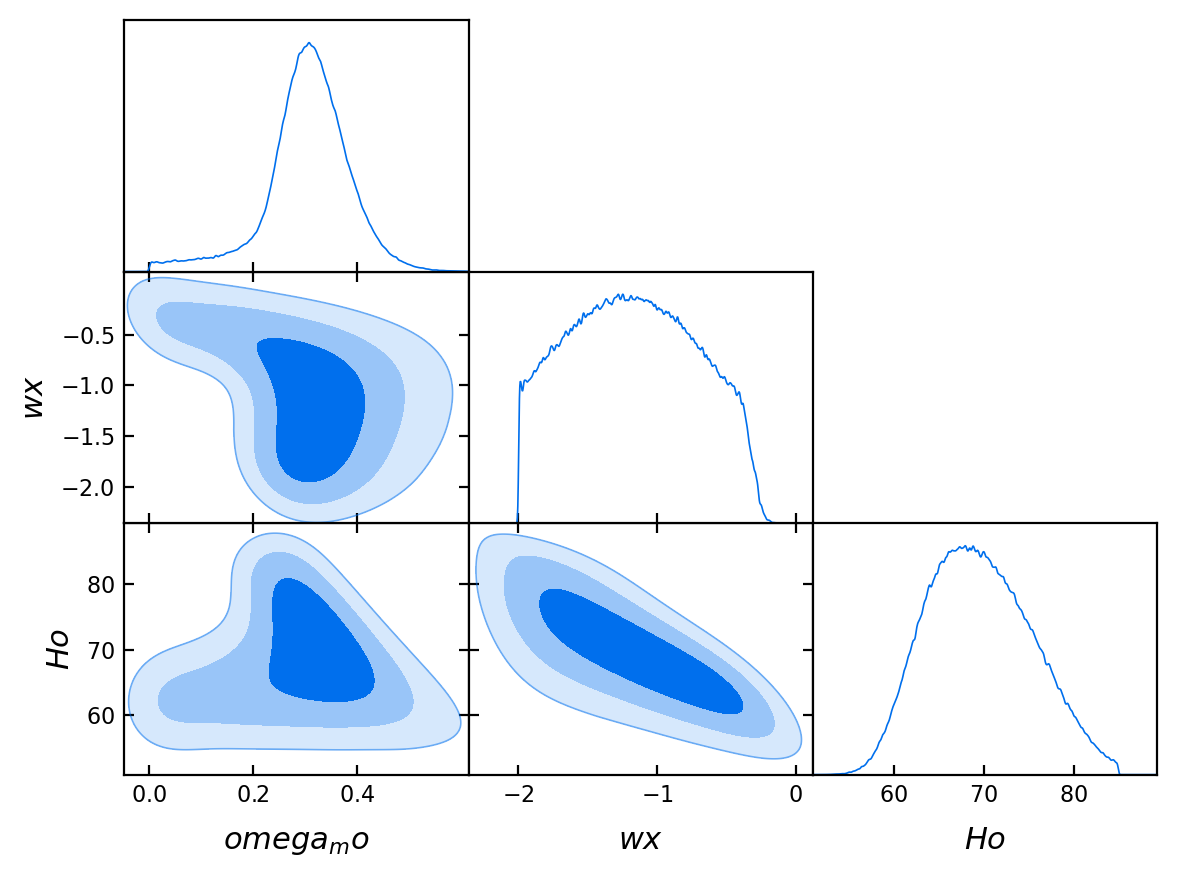

In [72]:
# g = plots.get_single_plotter()
# samples.updateSettings({'contours': [0.6827, 0.9545, 0.9973], 'fine_bins_2D': 400})  # Set fine_bins_2D here
# g.settings.num_plot_contours = 4
# # g.settings.fine_bins = 400
# g.triangle_plot([samples],filled= True);

g = plots.get_single_plotter()
samples.updateSettings({
    'contours': [0.6827, 0.9545, 0.9973], 
    'fine_bins_2D': 2000,  # Adjust this value as needed
    'smooth_scale_2D': 0.5,  # Adjust smoothing
    'fig_size':(10,10), # Increase figure size
    'dpi':500 # Increase resolution
})

g.settings.num_plot_contours = 4
# g.settings.fig_size = (8, 8)  
# g.settings.dpi = 300  

g.triangle_plot([samples], filled=True)